In [3]:
# import librosa
# import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile as wav
import random
import IPython.display as ipd
import scipy
from python_speech_features import mfcc
from python_speech_features import logfbank
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=e91a20458e81e2535bdd6b6fcd090dea5b1b588f5ce19cdf46b43036abe521fa
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [4]:
import tensorflow as tf

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.optimizers import SGD
import os

In [ ]:
path_data = "dataset"
path_npy = './Npy/'
print(path_data)

C:\Programe Info\MLP_test_speech\dataset


In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [9]:
def display(stft, word):
    # Plot spectrogram
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),  y_axis='log', x_axis='time', ax=ax)
    ax.set_title(f'Power spectrogram of {word}')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()


def extract_stft(audio, genre, nfft=2048, hop_length=1024, window='hann'):
    # Compute spectrogram. You can change the parameters to see if you can obtain a better performance
    stft = librosa.stft(audio, n_fft=nfft, hop_length=hop_length, window=window, win_length=nfft)
    stft = np.abs(stft)  # keep only the magnitude of the spectrum

    display(stft, genre)  # Display spectrogram for a file in each genre

    return stft

def read_audio(path_file):
    audio, sr = librosa.load(path_file, sr=None, mono=True)
    if len(audio) < sr:
        audio = np.pad(audio, (0, sr - len(audio)))  # pad with zeros last samples to 30s
    else:
        audio = audio[: sr]

    audio = audio / np.max(np.abs(audio)) # Normalize to [-1, 1]

    return audio

def make_input_data(path_file, folder):
    audio = read_audio(path_file)
    stft = extract_stft(audio, folder)

    return stft.T  # transpose the stft to get [time, freqs] instead. You can try [freqs, time] if you like


In [10]:
def parse_dataset(path_data):
    x_train, x_val, y_train, y_val = [], [], [], []  # lists for input-output data

    folders = sorted(os.listdir(path_data))
    for i, folder in enumerate(folders):
        path_folder = os.path.join(path_data, folder)
        files = os.listdir(path_folder)
        random.shuffle(files)
        files_val = random.sample(files, k=20)  # make 80-20 train-val split. k should be given as parameter. You can change this to see if you can obtain better performance
        files_train = [file for file in files if file not in files_val]
        for file in files:
            path_file = os.path.join(path_data, folder, file)
            stft = make_input_data(path_file, folder)
        # for file in files_train:
        #     path_file = os.path.join(path_data, folder, file)
        #     stft = make_input_data(path_file, folder)
        #     x_train.append(stft)
        #     y_train.append(i)
        #
        # for file in files_val:
        #     path_file = os.path.join(path_data, folder, file)
        #     stft = make_input_data(path_file, folder)
        #     x_val.append(stft)
        #     y_val.append(i)

    # Convert lists to np array and save them as .npy
    # x_train = np.asarray(x_train)
    # x_val = np.asarray(x_val)
    # y_train = np.asarray(y_train)
    # y_val = np.asarray(y_val)

    # print(f'Shapes for x_train {x_train.shape} x_val {x_val.shape} y_train {y_train.shape} y_val {y_val.shape}')
    # np.save(os.path.join(path_npy, 'x_train.npy'), x_train)
    # np.save(os.path.join(path_npy, 'x_val.npy'), x_val)
    # np.save(os.path.join(path_npy, 'y_train.npy'), y_train)
    # np.save(os.path.join(path_npy, 'y_val.npy'), y_val)

In [12]:
parse_dataset(path_data)

FileNotFoundError: ignored

In [ ]:
wav_pathname = "./drive/MyDrive/ML/dataset/down/004ae714_nohash_0.wav"
#wav_pathname = librosa.example("brahms")
y, sr = librosa.load(wav_pathname, sr = None, mono = True)
S = librosa.feature.melspectrogram(y = y, sr=sr, n_mels=128)

log_S = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [ ]:
S_rot=np.rot90(S,3)

print(len(S_rot))
print(len(S_rot[0]))

In [ ]:
mfcc1 = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta_mfcc  = librosa.feature.delta(mfcc1)
delta2_mfcc = librosa.feature.delta(mfcc1, order=2)

plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc1)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

M = np.vstack([mfcc1, delta_mfcc, delta2_mfcc])

In [ ]:
chroma = librosa.feature.chroma_stft(S = log_S)

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
librosa.display.specshow(log_S)
plt.ylabel('Hz')
plt.colorbar()

plt.subplot(2,1,2)
librosa.display.specshow(chroma, x_axis='time')
plt.ylabel('Pitch class')
plt.colorbar()

In [ ]:
#y_third = librosa.effects.pitch_shift(y = y, sr = sr, n_steps=4)
S = np.abs(librosa.stft(y))
pitches, magnitudes = librosa.piptrack(S = S, sr=sr, threshold = 1, ref = np.mean)
plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.waveshow(y = y, sr = sr)
# for i in range(1025):
#   for j in range(32):
#     if pitches[i][j] != 0:
#       print(i, j)
print(magnitudes.shape)
print(pitches)
plt.subplot(3, 1, 2), plt.plot(pitches);
plt.subplot(3, 1, 3), plt.plot(magnitudes);

------------------ De aici in jos

rate = frecventa de esantionare
sig1= semnalul nostru; are val amplitudinilor


In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.optimizers import SGD
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import random
from python_speech_features import mfcc
from sklearn.model_selection import train_test_split
import datetime
from scipy.io.wavfile import write
from pydub import AudioSegment as am
import sounddevice as sd

C:\Users\lucia\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
from matplotlib import cm


def plot_mfcc(mfcc_feat):
    ig, ax = plt.subplots()
    mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
    cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
    ax.set_title('MFCC')
    #Showing mfcc_data
    plt.show()
    #Showing mfcc_feat
    # plt.plot(mfcc_feat)
    plt.show()

(13, 99)


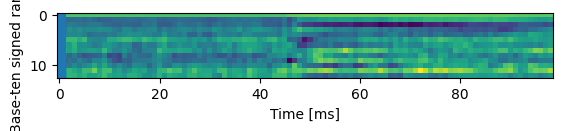

In [ ]:
(rate,sig1) = wav.read('dataset/down/00b01445_nohash_0.wav')
N = sig1.shape[0]
L = N / rate
f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, sig1)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Amplitude [Base-ten signed range (per sample)]')
mfcc_feat = mfcc(sig1,rate,nfft=400, winfunc=np.hamming).T

# plot_mfcc(mfcc_feat)
plt.imshow(mfcc_feat)
print(mfcc_feat.shape)

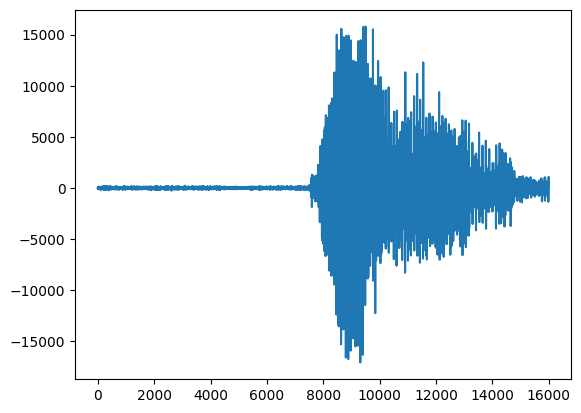

In [4]:
plt.plot(sig1)

# New Section

In [5]:
def read_audio(rate, sig):
    # audio, sr = librosa.load(path_file, sr=None, mono=True)

    # Make sure that audio has 1s
    if len(sig) < rate:
        sig = np.pad(sig, (0,rate - len(sig)))  # pad with zeros last samples to 1s
    else:
        sig = sig[:rate]

    sig = sig / np.max(np.abs(sig)) # Normalize to [-1, 1]

    return sig

In [ ]:
folders = os.listdir('dataset/')
data = []
y = []
ctr=0
for i, directory in enumerate(folders):
  soundfile = os.listdir('dataset/' + directory)
  print(directory)
  for file in soundfile:
    (rate,sig) = wav.read('dataset/' + directory + '/' + file)
    # print(sig.shape[0]/rate)
    sig = read_audio(rate, sig)
    # print(sig.shape[0]/rate)
    data.append(sig)
    y.append(i)

down
left
right
stop
up


In [54]:
print(sig.shape)

(16000,)


In [7]:
size = 99  #nr de frame uri
# X=[]
# X = np.array(X)
mfcc_max=np.zeros(13)
mfcc_max_matrix = np.empty((len(data), 13))
for i in range(len(data)):
    mfcc_feat = mfcc(data[i],rate,nfft=400, winfunc=np.hamming)
    mfcc_feat = np.array(mfcc_feat)
    # print(mfcc_feat.shape)

    for j in range(13):
        mfcc_max[j] = np.max(mfcc_feat[:,j])
    mfcc_max_matrix[i,:] = mfcc_max
    # X.append(mfcc_feat)




In [8]:
X=[]
for i in range(13):
    mfcc_max[i] = np.max(mfcc_max_matrix[:,i])
print(mfcc_max)
for i in range(len(data)):
    mfcc_feat = np.array(mfcc(data[i],rate,nfft=400, winfunc=np.hamming))

    for j in range(13):
        mfcc_feat[:,j] = mfcc_feat[:,j] / mfcc_max[j]
    X.append(mfcc_feat)

X = np.array(X)
print(X.shape)

[  4.27181765  74.98607624  97.55971245 108.76915997  84.95088902
 136.8257098  156.66309264 127.83537466 108.57641777 132.21633399
 111.35107788 117.66554354  90.91877903]
(19091, 99, 13)


In [9]:
mfcc_test = np.array(mfcc(data[0],rate,nfft=400, winfunc=np.hamming))
print(mfcc_test.shape)
print("TOT:")
print(mfcc_test)
print("PRIMA COLOANA:")
print(mfcc_test[:,4])
print("IMPARTIT")
print(mfcc_test[:,4]/mfcc_max[4])

(99, 13)
TOT:
[[-13.11436336 -25.21173686 -11.51278503 ... -20.82914297  -6.90577894
  -11.44618359]
 [-13.45372383 -24.45583621 -18.41765473 ... -15.8022567   -5.65425376
   13.21575562]
 [-12.4285647  -30.01740102 -14.33541566 ... -13.27946642 -11.5105492
   -2.82833953]
 ...
 [ -9.48831295 -27.51101502  -5.75167937 ...  -6.60133665  -5.00422994
   -5.86845621]
 [ -9.89477372 -22.01108795  -0.45461406 ...   2.35316532  -1.60642
   -6.42970507]
 [-10.25252197 -23.81784509  -5.87293065 ...   2.49124384   0.10026746
   13.58476094]]
PRIMA COLOANA:
[-21.07897872 -24.81896889 -18.00579644  -8.58687998 -20.24467758
 -21.08744597 -17.38090684 -18.82456731 -20.60395332 -20.96390112
 -19.46188669 -21.94116346 -15.15803143 -34.65120673 -35.98441185
 -42.00465113 -24.0911853  -20.43320503 -25.34206079 -22.37656958
 -30.65775617 -30.49408861 -34.14365853 -37.80942962 -21.94245655
 -27.07745845 -24.82784698 -11.71906946  -7.82632231 -12.77214225
  -5.39974721 -15.2893523  -10.13157035  -7.0578018

In [9]:
Y = np.array(y)

In [11]:
print(np.min(mfcc_feat))

-3.1360841350585233


In [12]:
# Y = np.array(y)
# sf = []
# folders = os.listdir('C:/Programe Info/MLP_test_speech/dataset/')
# for i in folders:
#   soundfile = os.listdir('C:/Programe Info/MLP_test_speech/dataset/' + i)
#   for j in soundfile:
#     sf.append('C:/Programe Info/MLP_test_speech/dataset/' + i + '/' + j)
#
# sf = np.array(sf)
# y = [i for i in soundfile]
# YY = pd.get_dummies(y)

In [13]:
# print(y)
# print(YY)

In [10]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(size, 13, 1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten(input_shape=(size, 13,1)))
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 11, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 9, 8)          584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 4, 8)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 4, 8)          0         
                                                                 
 flatten (Flatten)           (None, 1504)              0         
                                                                 
 dense (Dense)               (None, 64)                96320     
                                                        

In [11]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='CategoricalCrossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\lucia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train = x_train.reshape(-1, size, 13, 1)
x_test = x_test.reshape(-1, size, 13, 1)

In [13]:
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

y_train_one_hot = tf.one_hot(y_train, depth = 5).numpy()
y_test_one_hot = tf.one_hot(y_test, depth = 5).numpy()
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
# for i in y_train:
#   #if i is None:
#   print(type(i))


(14318,)
(4773,)
(14318, 99, 13, 1)
(4773, 99, 13, 1)
(14318, 5)
(4773, 5)


In [14]:
print(y_train_one_hot.shape)
print(x_train.shape)

(14318, 5)
(14318, 99, 13, 1)


In [15]:
print(x_test.shape)
print(y_test.shape)

(4773, 99, 13, 1)
(4773,)


In [16]:
print(y_train_one_hot)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
checkpoint_filepath = "modele/model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/fit0/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
                                                      histogram_freq=1 )

In [36]:
model.fit(
    x_train,
    y_train_one_hot,
    epochs=18,
    batch_size=32,
    validation_data=(x_test, y_test_one_hot),
    #shuffle=True
    callbacks=[model_checkpoint_callback, tensorboard_callback]
    )


Epoch 1/18
448/448 [==============================] - 6s 13ms/step - loss: 0.1807 - accuracy: 0.9351 - val_loss: 0.2467 - val_accuracy: 0.9185
Epoch 2/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1662 - accuracy: 0.9425 - val_loss: 0.2504 - val_accuracy: 0.9187
Epoch 3/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1635 - accuracy: 0.9430 - val_loss: 0.2912 - val_accuracy: 0.9089
Epoch 4/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1607 - accuracy: 0.9454 - val_loss: 0.2694 - val_accuracy: 0.9179
Epoch 5/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1528 - accuracy: 0.9480 - val_loss: 0.2476 - val_accuracy: 0.9242
Epoch 6/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1579 - accuracy: 0.9458 - val_loss: 0.2567 - val_accuracy: 0.9179
Epoch 7/18
448/448 [==============================] - 4s 10ms/step - loss: 0.1424 - accuracy: 0.9501 - val_loss: 0.2952 - val_accuracy: 0.9114

In [ ]:
filepath = 'TESTARE_VOICE/Recording.wav'
sound = am.from_file(filepath, format='wav', frame_rate=48000)
sound = sound.set_frame_rate(16000)
sound.export('TESTARE_VOICE/Recording2.wav', format='wav')

<_io.BufferedRandom name='C:/Programe Info/MLP_test_speech/TESTARE_VOICE/Recording2.wav'>

In [ ]:
stereo_audio = am.from_file(
    'TESTARE_VOICE/Recording2.wav', format='wav')
mono_audios = stereo_audio.split_to_mono()
mono_left = mono_audios[0].export(
    'TESTARE_VOICE/Recording2_adev.wav', format='wav')

In [ ]:
(rateT,sigT) = wav.read('TESTARE_VOICE/test0.wav')
 # print(sig.shape[0]/rate)

sigT = read_audio(rateT, sigT)
print(sigT.shape)
    # print(sig.shape[0]/rate)
mfcc_featT = mfcc(sigT,rateT,nfft=400, winfunc=np.blackman)
mfcc_featT = np.array(mfcc_featT)
for i in range(13):
    mfcc_featT[:, i] = mfcc_featT[:, i] / mfcc_max[i]


(16000,)


[Text(0.5, 0, 'Sample number'), Text(0, 0.5, 'Amplitude')]

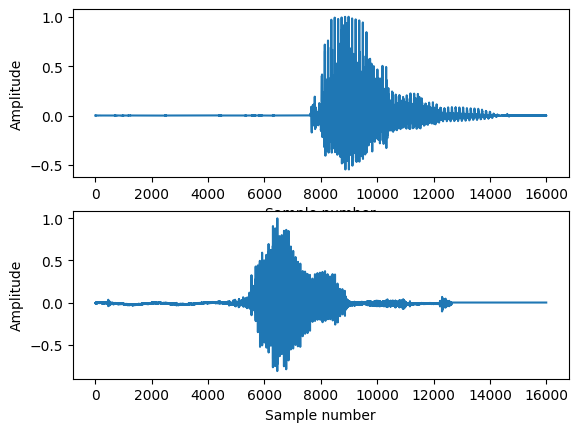

In [53]:
# plt.xlabel("Sample number")
# plt.ylabel("Amplitude")
# plt.plot(data[0])
fig, ax = plt.subplots(2)
ax[0].plot(data[0])
ax[0].set(xlabel="Sample number", ylabel="Amplitude")
ax[1].plot(data[3918])
ax[1].set(xlabel="Sample number", ylabel="Amplitude")

In [33]:
mfcc_featT = mfcc_featT.reshape(-1, size, 13, 1)
y_predict = model.predict(mfcc_featT)
# model.evaluate(intrare, iesire) #probabilitati --> one hot
#poze cu up, down....

1/1 [==============================] - 0s 25ms/step


array([[9.9973541e-09, 1.9641238e-01, 8.0358601e-01, 3.9260706e-10,
        1.6677876e-06]], dtype=float32)

In [23]:

import wavio as wv


In [31]:
#voice activity detection
#threshold pe semnal
freq = 16000
duration = 1
recording = sd.rec(int(duration * freq),
                   samplerate=freq, channels=1)
print("ACUM INCEPE")
sd.wait()
print("S-A TERMINAT")
write("TESTARE_VOICE/test0.wav", freq, recording)


ACUM INCEPE
S-A TERMINAT


In [118]:
from playsound import playsound

In [87]:
print(data[14315])

[-0.00024973 -0.0005827  -0.00108216 ...  0.00203946  0.00178973
  0.00158162]


In [88]:
from IPython.display import Audio, display

In [ ]:
display(Audio(wav_pathname))